# Final Project Big Data Platforms


Our Project objective is to identify the profiles of Twitterers, who are tweeting about University of Chicago and compare them to the profiles of Twitterers who are tweeting about other universities. 
This will help us make actionable business recommendations to help University improve the social media outreach programs

In [2]:
import sys
print(sys.version)
print(spark.version)

3.6.8 |Anaconda custom (64-bit)| (default, Dec 30 2018, 01:22:34) 
[GCC 7.3.0]
2.4.0-cdh6.3.0


## Load data

In [3]:
import numpy as np
from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
import seaborn as sns
from IPython.core.display import display, HTML
import pandas as pd
%reload_ext autoreload
%autoreload 1
%matplotlib inline
import matplotlib.pyplot as plt
from simhash import Simhash, SimhashIndex
import warnings
warnings.filterwarnings('ignore')
import sys
from pyspark.sql.functions import *
from pyspark.sql.types import *
import re
import json
from itertools import combinations, takewhile
import collections
import pandas as pd
from pyspark.ml.classification import LogisticRegression, LogisticRegressionModel
from pyspark.ml.evaluation import BinaryClassificationEvaluator
import subprocess

In [4]:
!hadoop fs -ls /user/ivy2/Tweets/

Java HotSpot(TM) 64-Bit Server VM warning: ignoring option MaxPermSize=512M; support was removed in 8.0
Found 31854 items
-rw-r--r--   3 ivy2 ivy2   55220293 2017-06-22 10:15 /user/ivy2/Tweets/tweets201706221015.json
-rw-r--r--   3 ivy2 ivy2   52384528 2017-06-22 11:15 /user/ivy2/Tweets/tweets201706221115.json
-rw-r--r--   3 ivy2 ivy2   56190692 2017-06-22 12:15 /user/ivy2/Tweets/tweets201706221215.json
-rw-r--r--   3 ivy2 ivy2   56992695 2017-06-22 13:15 /user/ivy2/Tweets/tweets201706221315.json
-rw-r--r--   3 ivy2 ivy2   54702790 2017-06-22 14:15 /user/ivy2/Tweets/tweets201706221415.json
-rw-r--r--   3 ivy2 ivy2   66415029 2017-06-22 15:15 /user/ivy2/Tweets/tweets201706221515.json
-rw-r--r--   3 ivy2 ivy2   63298555 2017-06-22 16:15 /user/ivy2/Tweets/tweets201706221615.json
-rw-r--r--   3 ivy2 ivy2   55417269 2017-06-22 17:15 /user/ivy2/Tweets/tweets201706221715.json
-rw-r--r--   3 ivy2 ivy2   54057246 2017-06-22 18:15 /user/ivy2/Tweets/tweets201706221815.json
-rw-r--r--   3 ivy2 ivy

-rw-r--r--   3 ivy2 ivy2   18225300 2017-06-27 04:15 /user/ivy2/Tweets/tweets201706270415.json
-rw-r--r--   3 ivy2 ivy2   20545752 2017-06-27 05:15 /user/ivy2/Tweets/tweets201706270515.json
-rw-r--r--   3 ivy2 ivy2   21991393 2017-06-27 06:15 /user/ivy2/Tweets/tweets201706270615.json
-rw-r--r--   3 ivy2 ivy2   28199043 2017-06-27 07:15 /user/ivy2/Tweets/tweets201706270715.json
-rw-r--r--   3 ivy2 ivy2   35805378 2017-06-27 08:15 /user/ivy2/Tweets/tweets201706270815.json
-rw-r--r--   3 ivy2 ivy2   38270988 2017-06-27 09:15 /user/ivy2/Tweets/tweets201706270915.json
-rw-r--r--   3 ivy2 ivy2   44431649 2017-06-27 10:15 /user/ivy2/Tweets/tweets201706271015.json
-rw-r--r--   3 ivy2 ivy2   49192445 2017-06-27 11:15 /user/ivy2/Tweets/tweets201706271115.json
-rw-r--r--   3 ivy2 ivy2   54128234 2017-06-27 12:15 /user/ivy2/Tweets/tweets201706271215.json
-rw-r--r--   3 ivy2 ivy2   51718940 2017-06-27 13:15 /user/ivy2/Tweets/tweets201706271315.json
-rw-r--r--   3 ivy2 ivy2   58784857 2017-06-27 14:

-rw-r--r--   3 ivy2 ivy2   36238502 2017-08-15 05:15 /user/ivy2/Tweets/tweets201708150515.json
-rw-r--r--   3 ivy2 ivy2   42369463 2017-08-15 06:15 /user/ivy2/Tweets/tweets201708150615.json
-rw-r--r--   3 ivy2 ivy2   64894716 2017-08-15 07:15 /user/ivy2/Tweets/tweets201708150715.json
-rw-r--r--   3 ivy2 ivy2   74776861 2017-08-15 08:15 /user/ivy2/Tweets/tweets201708150815.json
-rw-r--r--   3 ivy2 ivy2   91794176 2017-08-15 09:15 /user/ivy2/Tweets/tweets201708150915.json
-rw-r--r--   3 ivy2 ivy2  101824076 2017-08-15 10:15 /user/ivy2/Tweets/tweets201708151015.json
-rw-r--r--   3 ivy2 ivy2  105531434 2017-08-15 11:15 /user/ivy2/Tweets/tweets201708151115.json
-rw-r--r--   3 ivy2 ivy2   98842204 2017-08-15 12:15 /user/ivy2/Tweets/tweets201708151215.json
-rw-r--r--   3 ivy2 ivy2  101708654 2017-08-15 13:15 /user/ivy2/Tweets/tweets201708151315.json
-rw-r--r--   3 ivy2 ivy2   93121736 2017-08-15 14:15 /user/ivy2/Tweets/tweets201708151415.json
-rw-r--r--   3 ivy2 ivy2   88382149 2017-08-15 15:

-rw-r--r--   3 ivy2 ivy2   48537643 2017-10-05 06:15 /user/ivy2/Tweets/tweets201710050615.json
-rw-r--r--   3 ivy2 ivy2   58578395 2017-10-05 07:15 /user/ivy2/Tweets/tweets201710050715.json
-rw-r--r--   3 ivy2 ivy2   76546936 2017-10-05 08:15 /user/ivy2/Tweets/tweets201710050815.json
-rw-r--r--   3 ivy2 ivy2   87316704 2017-10-05 09:15 /user/ivy2/Tweets/tweets201710050915.json
-rw-r--r--   3 ivy2 ivy2  113922496 2017-10-05 10:15 /user/ivy2/Tweets/tweets201710051015.json
-rw-r--r--   3 ivy2 ivy2  118384672 2017-10-05 11:15 /user/ivy2/Tweets/tweets201710051115.json
-rw-r--r--   3 ivy2 ivy2  111660797 2017-10-05 12:15 /user/ivy2/Tweets/tweets201710051215.json
-rw-r--r--   3 ivy2 ivy2  103702421 2017-10-05 13:15 /user/ivy2/Tweets/tweets201710051315.json
-rw-r--r--   3 ivy2 ivy2  108094162 2017-10-05 14:15 /user/ivy2/Tweets/tweets201710051415.json
-rw-r--r--   3 ivy2 ivy2   93495470 2017-10-05 15:15 /user/ivy2/Tweets/tweets201710051515.json
-rw-r--r--   3 ivy2 ivy2   84780115 2017-10-05 16:

-rw-r--r--   3 ivy2 ivy2   27388381 2017-12-18 06:15 /user/ivy2/Tweets/tweets201712180615.json
-rw-r--r--   3 ivy2 ivy2   29578514 2017-12-18 07:15 /user/ivy2/Tweets/tweets201712180715.json
-rw-r--r--   3 ivy2 ivy2   35338683 2017-12-18 08:15 /user/ivy2/Tweets/tweets201712180815.json
-rw-r--r--   3 ivy2 ivy2   51751991 2017-12-18 09:15 /user/ivy2/Tweets/tweets201712180915.json
-rw-r--r--   3 ivy2 ivy2   48151966 2017-12-18 10:15 /user/ivy2/Tweets/tweets201712181015.json
-rw-r--r--   3 ivy2 ivy2   50854010 2017-12-18 11:15 /user/ivy2/Tweets/tweets201712181115.json
-rw-r--r--   3 ivy2 ivy2   56227633 2017-12-18 12:15 /user/ivy2/Tweets/tweets201712181215.json
-rw-r--r--   3 ivy2 ivy2   57167621 2017-12-18 13:15 /user/ivy2/Tweets/tweets201712181315.json
-rw-r--r--   3 ivy2 ivy2   57152197 2017-12-18 14:15 /user/ivy2/Tweets/tweets201712181415.json
-rw-r--r--   3 ivy2 ivy2   57129272 2017-12-18 15:15 /user/ivy2/Tweets/tweets201712181515.json
-rw-r--r--   3 ivy2 ivy2   58946427 2017-12-18 16:

-rw-r--r--   3 ivy2 ivy2   77799733 2018-05-09 23:15 /user/ivy2/Tweets/tweets201805092315.json
-rw-r--r--   3 ivy2 ivy2   59160244 2018-05-10 00:15 /user/ivy2/Tweets/tweets201805100015.json
-rw-r--r--   3 ivy2 ivy2   47524788 2018-05-10 01:15 /user/ivy2/Tweets/tweets201805100115.json
-rw-r--r--   3 ivy2 ivy2   39247845 2018-05-10 02:15 /user/ivy2/Tweets/tweets201805100215.json
-rw-r--r--   3 ivy2 ivy2   34054159 2018-05-10 03:15 /user/ivy2/Tweets/tweets201805100315.json
-rw-r--r--   3 ivy2 ivy2   33570123 2018-05-10 04:15 /user/ivy2/Tweets/tweets201805100415.json
-rw-r--r--   3 ivy2 ivy2   34707748 2018-05-10 05:15 /user/ivy2/Tweets/tweets201805100515.json
-rw-r--r--   3 ivy2 ivy2   48815216 2018-05-10 06:15 /user/ivy2/Tweets/tweets201805100615.json
-rw-r--r--   3 ivy2 ivy2   57982238 2018-05-10 07:15 /user/ivy2/Tweets/tweets201805100715.json
-rw-r--r--   3 ivy2 ivy2   67229824 2018-05-10 08:15 /user/ivy2/Tweets/tweets201805100815.json
-rw-r--r--   3 ivy2 ivy2   76248445 2018-05-10 09:

-rw-r--r--   3 ivy2 ivy2   62311510 2018-08-14 23:15 /user/ivy2/Tweets/tweets201808142315.json
-rw-r--r--   3 ivy2 ivy2   59136528 2018-08-15 00:15 /user/ivy2/Tweets/tweets201808150015.json
-rw-r--r--   3 ivy2 ivy2   46402323 2018-08-15 01:15 /user/ivy2/Tweets/tweets201808150115.json
-rw-r--r--   3 ivy2 ivy2   37530434 2018-08-15 02:15 /user/ivy2/Tweets/tweets201808150215.json
-rw-r--r--   3 ivy2 ivy2   33076226 2018-08-15 03:15 /user/ivy2/Tweets/tweets201808150315.json
-rw-r--r--   3 ivy2 ivy2   36956940 2018-08-15 04:15 /user/ivy2/Tweets/tweets201808150415.json
-rw-r--r--   3 ivy2 ivy2   38637545 2018-08-15 05:15 /user/ivy2/Tweets/tweets201808150515.json
-rw-r--r--   3 ivy2 ivy2   42654821 2018-08-15 06:15 /user/ivy2/Tweets/tweets201808150615.json
-rw-r--r--   3 ivy2 ivy2   50886125 2018-08-15 07:15 /user/ivy2/Tweets/tweets201808150715.json
-rw-r--r--   3 ivy2 ivy2   64364461 2018-08-15 08:15 /user/ivy2/Tweets/tweets201808150815.json
-rw-r--r--   3 ivy2 ivy2   79231530 2018-08-15 09:

-rw-r--r--   3 ivy2 ivy2   46038340 2018-11-23 19:15 /user/ivy2/Tweets/tweets201811231915.json
-rw-r--r--   3 ivy2 ivy2   43393934 2018-11-23 20:15 /user/ivy2/Tweets/tweets201811232015.json
-rw-r--r--   3 ivy2 ivy2   46036784 2018-11-23 21:15 /user/ivy2/Tweets/tweets201811232115.json
-rw-r--r--   3 ivy2 ivy2   54916404 2018-11-23 22:15 /user/ivy2/Tweets/tweets201811232215.json
-rw-r--r--   3 ivy2 ivy2   54024179 2018-11-23 23:15 /user/ivy2/Tweets/tweets201811232315.json
-rw-r--r--   3 ivy2 ivy2   47906131 2018-11-24 00:15 /user/ivy2/Tweets/tweets201811240015.json
-rw-r--r--   3 ivy2 ivy2   39336531 2018-11-24 01:15 /user/ivy2/Tweets/tweets201811240115.json
-rw-r--r--   3 ivy2 ivy2   34561461 2018-11-24 02:15 /user/ivy2/Tweets/tweets201811240215.json
-rw-r--r--   3 ivy2 ivy2   32809190 2018-11-24 03:15 /user/ivy2/Tweets/tweets201811240315.json
-rw-r--r--   3 ivy2 ivy2   36270134 2018-11-24 04:15 /user/ivy2/Tweets/tweets201811240415.json
-rw-r--r--   3 ivy2 ivy2   37408213 2018-11-24 05:

-rw-r--r--   3 ivy2 ivy2   43739586 2019-03-07 02:15 /user/ivy2/Tweets/tweets201903070215.json
-rw-r--r--   3 ivy2 ivy2   43556536 2019-03-07 03:15 /user/ivy2/Tweets/tweets201903070315.json
-rw-r--r--   3 ivy2 ivy2   41064418 2019-03-07 04:15 /user/ivy2/Tweets/tweets201903070415.json
-rw-r--r--   3 ivy2 ivy2   45747859 2019-03-07 05:15 /user/ivy2/Tweets/tweets201903070515.json
-rw-r--r--   3 ivy2 ivy2   56829491 2019-03-07 06:15 /user/ivy2/Tweets/tweets201903070615.json
-rw-r--r--   3 ivy2 ivy2   68525026 2019-03-07 07:15 /user/ivy2/Tweets/tweets201903070715.json
-rw-r--r--   3 ivy2 ivy2   84891511 2019-03-07 08:15 /user/ivy2/Tweets/tweets201903070815.json
-rw-r--r--   3 ivy2 ivy2   90812548 2019-03-07 09:15 /user/ivy2/Tweets/tweets201903070915.json
-rw-r--r--   3 ivy2 ivy2   93984115 2019-03-07 10:15 /user/ivy2/Tweets/tweets201903071015.json
-rw-r--r--   3 ivy2 ivy2  100736648 2019-03-07 11:15 /user/ivy2/Tweets/tweets201903071115.json
-rw-r--r--   3 ivy2 ivy2   91927438 2019-03-07 12:

-rw-r--r--   3 ivy2 ivy2  150964971 2019-06-13 17:15 /user/ivy2/Tweets/tweets201906131715.json
-rw-r--r--   3 ivy2 ivy2  167193349 2019-06-13 18:15 /user/ivy2/Tweets/tweets201906131815.json
-rw-r--r--   3 ivy2 ivy2  135591118 2019-06-13 19:15 /user/ivy2/Tweets/tweets201906131915.json
-rw-r--r--   3 ivy2 ivy2  137371248 2019-06-13 20:15 /user/ivy2/Tweets/tweets201906132015.json
-rw-r--r--   3 ivy2 ivy2  140024478 2019-06-13 21:15 /user/ivy2/Tweets/tweets201906132115.json
-rw-r--r--   3 ivy2 ivy2  137230393 2019-06-13 22:15 /user/ivy2/Tweets/tweets201906132215.json
-rw-r--r--   3 ivy2 ivy2  105091285 2019-06-13 23:15 /user/ivy2/Tweets/tweets201906132315.json
-rw-r--r--   3 ivy2 ivy2   95388691 2019-06-14 00:15 /user/ivy2/Tweets/tweets201906140015.json
-rw-r--r--   3 ivy2 ivy2   74669668 2019-06-14 01:15 /user/ivy2/Tweets/tweets201906140115.json
-rw-r--r--   3 ivy2 ivy2   52382438 2019-06-14 03:15 /user/ivy2/Tweets/tweets201906140315.json
-rw-r--r--   3 ivy2 ivy2   48826878 2019-06-14 04:

-rw-r--r--   3 ivy2 ivy2   76673601 2019-08-29 18:15 /user/ivy2/Tweets/tweets201908291815.json
-rw-r--r--   3 ivy2 ivy2   74897750 2019-08-29 19:15 /user/ivy2/Tweets/tweets201908291915.json
-rw-r--r--   3 ivy2 ivy2   85696159 2019-08-29 20:15 /user/ivy2/Tweets/tweets201908292015.json
-rw-r--r--   3 ivy2 ivy2   80595420 2019-08-29 21:15 /user/ivy2/Tweets/tweets201908292115.json
-rw-r--r--   3 ivy2 ivy2   69367329 2019-08-29 22:15 /user/ivy2/Tweets/tweets201908292215.json
-rw-r--r--   3 ivy2 ivy2   59889511 2019-08-29 23:15 /user/ivy2/Tweets/tweets201908292315.json
-rw-r--r--   3 ivy2 ivy2   56744787 2019-08-30 00:15 /user/ivy2/Tweets/tweets201908300015.json
-rw-r--r--   3 ivy2 ivy2   46058274 2019-08-30 01:15 /user/ivy2/Tweets/tweets201908300115.json
-rw-r--r--   3 ivy2 ivy2   41668967 2019-08-30 02:15 /user/ivy2/Tweets/tweets201908300215.json
-rw-r--r--   3 ivy2 ivy2   42707939 2019-08-30 03:15 /user/ivy2/Tweets/tweets201908300315.json
-rw-r--r--   3 ivy2 ivy2   39216648 2019-08-30 04:

-rw-r--r--   3 ivy2 ivy2   83199975 2019-12-07 15:15 /user/ivy2/Tweets/tweets201912071515.json
-rw-r--r--   3 ivy2 ivy2   72562514 2019-12-07 16:15 /user/ivy2/Tweets/tweets201912071615.json
-rw-r--r--   3 ivy2 ivy2   81955684 2019-12-07 17:15 /user/ivy2/Tweets/tweets201912071715.json
-rw-r--r--   3 ivy2 ivy2   78162031 2019-12-07 18:15 /user/ivy2/Tweets/tweets201912071815.json
-rw-r--r--   3 ivy2 ivy2   76240684 2019-12-07 19:15 /user/ivy2/Tweets/tweets201912071915.json
-rw-r--r--   3 ivy2 ivy2   83346610 2019-12-07 20:15 /user/ivy2/Tweets/tweets201912072015.json
-rw-r--r--   3 ivy2 ivy2  179057758 2019-12-07 21:15 /user/ivy2/Tweets/tweets201912072115.json
-rw-r--r--   3 ivy2 ivy2  207931726 2019-12-07 22:15 /user/ivy2/Tweets/tweets201912072215.json
-rw-r--r--   3 ivy2 ivy2  115938803 2019-12-07 23:15 /user/ivy2/Tweets/tweets201912072315.json
-rw-r--r--   3 ivy2 ivy2   92425441 2019-12-08 00:15 /user/ivy2/Tweets/tweets201912080015.json
-rw-r--r--   3 ivy2 ivy2   81126862 2019-12-08 01:

-rw-r--r--   3 ivy2 ivy2   70512592 2020-03-20 20:15 /user/ivy2/Tweets/tweets202003202015.json
-rw-r--r--   3 ivy2 ivy2   76646002 2020-03-20 21:15 /user/ivy2/Tweets/tweets202003202115.json
-rw-r--r--   3 ivy2 ivy2   70040256 2020-03-20 22:15 /user/ivy2/Tweets/tweets202003202215.json
-rw-r--r--   3 ivy2 ivy2   66081674 2020-03-20 23:15 /user/ivy2/Tweets/tweets202003202315.json
-rw-r--r--   3 ivy2 ivy2   52934805 2020-03-21 00:15 /user/ivy2/Tweets/tweets202003210015.json
-rw-r--r--   3 ivy2 ivy2   48771307 2020-03-21 01:15 /user/ivy2/Tweets/tweets202003210115.json
-rw-r--r--   3 ivy2 ivy2   41121849 2020-03-21 02:15 /user/ivy2/Tweets/tweets202003210215.json
-rw-r--r--   3 ivy2 ivy2   35098793 2020-03-21 03:15 /user/ivy2/Tweets/tweets202003210315.json
-rw-r--r--   3 ivy2 ivy2   32580300 2020-03-21 04:15 /user/ivy2/Tweets/tweets202003210415.json
-rw-r--r--   3 ivy2 ivy2   32013690 2020-03-21 05:15 /user/ivy2/Tweets/tweets202003210515.json
-rw-r--r--   3 ivy2 ivy2   34421248 2020-03-21 06:

-rw-r--r--   3 ivy2 ivy2   79567462 2020-07-05 01:15 /user/ivy2/Tweets/tweets202007050115.json
-rw-r--r--   3 ivy2 ivy2   65223030 2020-07-05 02:15 /user/ivy2/Tweets/tweets202007050215.json
-rw-r--r--   3 ivy2 ivy2   59753170 2020-07-05 03:15 /user/ivy2/Tweets/tweets202007050315.json
-rw-r--r--   3 ivy2 ivy2   55601891 2020-07-05 04:15 /user/ivy2/Tweets/tweets202007050415.json
-rw-r--r--   3 ivy2 ivy2   51479958 2020-07-05 05:15 /user/ivy2/Tweets/tweets202007050515.json
-rw-r--r--   3 ivy2 ivy2   62179320 2020-07-05 06:15 /user/ivy2/Tweets/tweets202007050615.json
-rw-r--r--   3 ivy2 ivy2   69532623 2020-07-05 07:15 /user/ivy2/Tweets/tweets202007050715.json
-rw-r--r--   3 ivy2 ivy2   84239840 2020-07-05 08:15 /user/ivy2/Tweets/tweets202007050815.json
-rw-r--r--   3 ivy2 ivy2  116137847 2020-07-05 09:15 /user/ivy2/Tweets/tweets202007050915.json
-rw-r--r--   3 ivy2 ivy2  116697072 2020-07-05 10:15 /user/ivy2/Tweets/tweets202007051015.json
-rw-r--r--   3 ivy2 ivy2  113375036 2020-07-05 11:

-rw-r--r--   3 ivy2 ivy2   81048408 2020-10-19 02:15 /user/ivy2/Tweets/tweets202010190215.json
-rw-r--r--   3 ivy2 ivy2   73749307 2020-10-19 03:15 /user/ivy2/Tweets/tweets202010190315.json
-rw-r--r--   3 ivy2 ivy2   70820722 2020-10-19 04:15 /user/ivy2/Tweets/tweets202010190415.json
-rw-r--r--   3 ivy2 ivy2   78984277 2020-10-19 05:15 /user/ivy2/Tweets/tweets202010190515.json
-rw-r--r--   3 ivy2 ivy2   77640273 2020-10-19 06:15 /user/ivy2/Tweets/tweets202010190615.json
-rw-r--r--   3 ivy2 ivy2  104157345 2020-10-19 07:15 /user/ivy2/Tweets/tweets202010190715.json
-rw-r--r--   3 ivy2 ivy2  117305586 2020-10-19 08:15 /user/ivy2/Tweets/tweets202010190815.json
-rw-r--r--   3 ivy2 ivy2  114718738 2020-10-19 09:15 /user/ivy2/Tweets/tweets202010190915.json
-rw-r--r--   3 ivy2 ivy2  119345247 2020-10-19 10:15 /user/ivy2/Tweets/tweets202010191015.json
-rw-r--r--   3 ivy2 ivy2  116463060 2020-10-19 12:15 /user/ivy2/Tweets/tweets202010191215.json
-rw-r--r--   3 ivy2 ivy2  111550245 2020-10-19 13:

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [5]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('max_colwidth',100)    
display(HTML("<style>.container { width:95% !important; }</style>"))

In [6]:
spark.conf.set("spark.sql.repl.eagerEval.enabled",True)

In [7]:
# directory = 'hdfs:///user/ivy2/Tweets/'
# file = '*.json'
# path = directory + file

In [6]:
directory = 'gs://msca-bdp-tweets/Tweets/'
file = '*.json'
path = directory + file

In [8]:
df = spark.read.json(path)

In [9]:
df.printSchema()

root
 |-- contributors: string (nullable = true)
 |-- coordinates: struct (nullable = true)
 |    |-- coordinates: array (nullable = true)
 |    |    |-- element: double (containsNull = true)
 |    |-- type: string (nullable = true)
 |-- created_at: string (nullable = true)
 |-- display_text_range: array (nullable = true)
 |    |-- element: long (containsNull = true)
 |-- entities: struct (nullable = true)
 |    |-- hashtags: array (nullable = true)
 |    |    |-- element: struct (containsNull = true)
 |    |    |    |-- indices: array (nullable = true)
 |    |    |    |    |-- element: long (containsNull = true)
 |    |    |    |-- text: string (nullable = true)
 |    |-- media: array (nullable = true)
 |    |    |-- element: struct (containsNull = true)
 |    |    |    |-- additional_media_info: struct (nullable = true)
 |    |    |    |    |-- description: string (nullable = true)
 |    |    |    |    |-- embeddable: boolean (nullable = true)
 |    |    |    |    |-- monetizable: bo

In [10]:
df.columns

['contributors',
 'coordinates',
 'created_at',
 'display_text_range',
 'entities',
 'extended_entities',
 'extended_tweet',
 'favorite_count',
 'favorited',
 'filter_level',
 'geo',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'limit',
 'place',
 'possibly_sensitive',
 'quote_count',
 'quoted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status_permalink',
 'reply_count',
 'retweet_count',
 'retweeted',
 'retweeted_status',
 'scopes',
 'source',
 'text',
 'timestamp_ms',
 'truncated',
 'user',
 'withheld_copyright',
 'withheld_in_countries']

In [11]:
df

contributors,coordinates,created_at,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,filter_level,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,limit,place,possibly_sensitive,quote_count,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,reply_count,retweet_count,retweeted,retweeted_status,scopes,source,text,timestamp_ms,truncated,user,withheld_copyright,withheld_in_countries
null,null,Thu Jun 22 23:16:...,null,"[[], [[,, pic.twi...","[[[,, pic.twitter...",null,0,false,low,null,878028835710619648,878028835710619648,null,null,null,null,null,false,en,null,null,false,null,null,null,null,null,null,0,false,"[,, Wed Jun 14 18...",null,"<a href=""http://t...",RT @millselle: my...,1498173362077,false,"[false, Sat Nov 3...",null,null
null,null,Thu Jun 22 23:16:...,"[0, 19]","[[],, [], [[twitt...",null,null,0,false,low,null,878028835832209410,878028835832209410,null,null,null,null,null,true,en,null,null,false,null,"[,, Thu Jun 22 22...",878021691875536896,878021691875536896,null,null,0,false,null,null,"<a href=""http://t...",You clean up nice...,1498173362106,false,"[false, Thu May 2...",null,null
null,null,Thu Jun 22 23:16:...,null,"[[],, [], [], [[2...",null,null,0,false,low,null,878028837845696512,878028837845696512,null,null,null,null,null,false,en,null,null,null,null,null,null,null,null,null,0,false,"[,, Thu Jun 22 21...",null,"<a href=""http://t...",RT @ACEPNow: Mike...,1498173362586,false,"[false, Tue May 0...",null,null
null,null,Thu Jun 22 23:16:...,null,"[[],, [], [], [[1...",null,null,0,false,low,null,878028839091417088,878028839091417088,null,null,null,null,null,false,en,null,null,null,null,null,null,null,null,null,0,false,"[,, Thu Jun 22 23...",null,"<a href=""http://t...",RT @MikeAScotto: ...,1498173362883,false,"[false, Sat Jul 2...",null,null
null,null,Thu Jun 22 23:16:...,null,"[[],, [], [[,, [1...",null,null,0,false,low,null,878028839233794050,878028839233794050,null,null,null,null,null,false,en,null,null,null,null,null,null,null,null,null,0,false,"[,, Thu Jun 22 22...",null,"<a href=""http://t...",RT @rgofficial_3:...,1498173362917,false,"[false, Thu Jun 1...",null,null
null,null,Thu Jun 22 23:16:...,"[0, 140]","[[[[65, 74], Whit...",null,"[[0, 140], [[[[65...",0,false,low,null,878028840198586369,878028840198586369,null,null,null,null,null,false,en,null,null,false,null,null,null,null,null,null,0,false,null,null,"<a href=""https://...",TIX https://t.co/...,1498173363147,true,"[false, Sat Apr 2...",null,null
null,null,Thu Jun 22 23:16:...,null,"[[[[0, 12], Jimmy...",null,null,0,false,low,null,878028843629641728,878028843629641728,null,null,null,null,null,false,en,null,null,null,null,null,null,null,null,null,0,false,null,null,"<a href=""http://t...",#JimmyButler is n...,1498173363965,false,"[false, Wed Feb 1...",null,null
null,null,Thu Jun 22 23:16:...,null,"[[],, [], [[,, [1...",null,null,0,false,low,null,878028844099227648,878028844099227648,null,null,null,null,null,false,en,null,null,null,null,null,null,null,null,null,0,false,"[,, Thu Jun 22 17...",null,"<a href=""http://t...",RT @Drunk_Kane88:...,1498173364077,false,"[false, Tue Oct 2...",null,null
null,null,Thu Jun 22 23:16:...,null,"[[], [[,, pic.twi...","[[[,, pic.twitter...",null,0,false,low,null,878028844262752258,878028844262752258,null,null,null,null,null,false,en,null,null,false,null,null,null,null,null,null,0,false,"[,, Wed Jun 21 21...",null,"<a href=""https://...",RT @Omerchoudhary...,1498173364116,false,"[false, Thu Jul 1...",null,null
null,null,Thu Jun 22 23:16:...,null,"[[],, [], [[fb.me...",null,null,0,false,low,null,878028844262760448,878028844262760448,null,null,null,null,null,false,en,null,null,false,null,null,null,null,null,null,0,false,null,null,"<a href=""http://w...",To Mike Zuckerbur...,1498173364116,false,"[false, Wed May 1...",null,null


In [12]:
df.count()

363510776

In [13]:
uchicago=['university of chicago','uchicago']
unebraska =  ['university of nebraska']
unortheast=['northeastern university']
brown=['brown university']
northwestern = ['northwestern','northwestern university', 'northwesternu']
depaul = ['depaul university','depaulu']
stanford = ['stanford university','stanfordu']
harvard = ['harvard','harvard university']
yale = ['yale','yale university']

In [18]:
import pyspark.sql.functions as psf
## Filtering tweetes that contain the universities names
df_uchicago_s=df.filter(psf.lower(df.text).rlike('|'.join(uchicago)))
df_unebraska_s=df.filter(psf.lower(df.text).rlike('|'.join(unebraska)))
df_unortheast_s=df.filter(psf.lower(df.text).rlike('|'.join(unortheast)))
df_brown_s=df.filter(psf.lower(df.text).rlike('|'.join(brown)))
df_northwestern_s=df.filter(psf.lower(df.text).rlike('|'.join(northwestern)))
df_depaul_s=df.filter(psf.lower(df.text).rlike('|'.join(depaul)))
df_stanford_s=df.filter(psf.lower(df.text).rlike('|'.join(stanford)))
df_yale_s=df.filter(psf.lower(df.text).rlike('|'.join(yale)))
df_harvard_s=df.filter(psf.lower(df.text).rlike('|'.join(harvard)))

In [19]:
df_uchicago_s.count()

702506

In [20]:
df_harvard_s.count()

4552234

In [21]:
df_yale_s.count()

894342

In [22]:
df_stanford_s.count()

542626

## Identify tweets related to UChicago and 3-4 universities of your choice
1. UChicago
2. Harvard
3. Yale
4. Stanford


## Discard irrelevant tweets and clean data


Twitter provide good explanation of each variable here. Choosing variable based on explanation.    
Twitter object : https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet  
User object : https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/user

In [ ]:
# keep only selected columns
df_filtered = df.select(\
    # tweet object
    col('created_at'),
    col('id'),
#     col('retweet_count'), # I found out in the process that this column contain all 0
    col('retweeted_status.retweet_count').alias('retweet_count'), # this is correct col for retweet count
    col('place'),
    col('text'),
#     col('favorite_count'), # I found out in the process that this column contain all 0
    col('retweeted_status.favorite_count').alias('favorite_count'), # this is correct col for retweet count
    # user object
    col('user.id').alias('user_id'),
    col('user.screen_name').alias('user_name'),
    col('user.statuses_count').alias('user_message'),
    col('user.location').alias('user_location'),
    col('user.followers_count').alias('user_followers_count'))

In [ ]:
# save to directory

# dir_out='gs://msca-bdp-tweets/aamer/df_filtered'
# df_filtered.write.format("parquet").\
# mode('overwrite').\
# save(dir_out)

# load data

# df_filtered = spark.read.parquet("gs://msca-bdp-tweets/aamer/df_filtered/*.parquet")
# df_filtered.limit(20)

In [6]:
# keywords for each University
uchi = ['uchicago','university of chicago','uofc']
harvard = ['harvard','harvard university']
yale = ['yale','yale university']
stanford = ['stanford', 'stanford university']

In [21]:
# each university
df_uchi = df_filtered.where(
    reduce(lambda a, b: a|b, (df['text'].like('%'+kw+"%") for kw in uchi))
)
df_harvard = df_filtered.where(
    reduce(lambda a, b: a|b, (df['text'].like('%'+kw+"%") for kw in harvard))
)
df_yale = df_filtered.where(
    reduce(lambda a, b: a|b, (df['text'].like('%'+kw+"%") for kw in yale))
)
df_stanford = df_filtered.where(
    reduce(lambda a, b: a|b, (df['text'].like('%'+kw+"%") for kw in stanford))
)

In [ ]:
# # save to directory
# dir_out='gs://msca-bdp-tweets/aamer/df_uchi4'
# df_uchi.repartition(1).write.format("parquet").\
# mode('overwrite').\
# save(dir_out)

# # save to directory
# dir_out='gs://msca-bdp-tweets/aamer/df_harvard1'
# df_harvard.repartition(1).write.format("parquet").\
# mode('overwrite').\
# save(dir_out)

# # save to directory
# dir_out='gs://msca-bdp-tweets/aamer/df_yale1'
# df_yale.repartition(1).write.format("parquet").\
# mode('overwrite').\
# save(dir_out)

# # save to directory
# dir_out='ggs://msca-bdp-tweets/aamer/df_stanford1'
# df_stanford.repartition(1).write.format("parquet").\
# mode('overwrite').\
# save(dir_out)

In [1]:
# load data

df_uchi = spark.read.parquet("gs://msca-bdp-tweets/aamer/df_uchi4/*.parquet")
df_harvard = spark.read.parquet("gs://msca-bdp-tweets/aamer/df_harvard1/*.parquet")
df_yale = spark.read.parquet("gs://msca-bdp-tweets/aamer/df_yale1/*.parquet")
df_stanford = spark.read.parquet("gs://msca-bdp-tweets/aamer/df_stanford1/*.parquet")

In [ ]:
# combind to get all df_alluni
df_alluni = pd.concat(
    [df_uchi.toPandas(),df_harvard.toPandas(),df_yale.toPandas(),df_stanford.toPandas()], axis = 0
)

In [2]:
df_alluni = df_uchi.union(df_harvard).union(df_yale).union(df_stanford)


In [8]:
# sample tweets with uchicago
df_uchi.select(['text']).limit(3).toPandas()['text'].tolist()

['University of Chicago, union busting since 1971...at least\n@uchicagogsu https://t.co/jDWdHr9EPE',
 'RT @aknafl: University of Chicago, union busting since 1971...at least\n@uchicagogsu https://t.co/jDWdHr9EPE',
 '@uchicagogsu link to article: https://t.co/u3GsCZiYlR']

## Complete thorough EDA to identify which variables you can use to profile the Twitterers


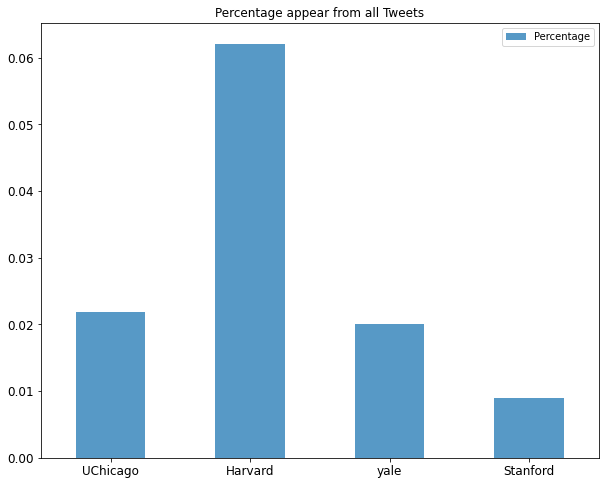

In [9]:
# % of tweet mention each U
eda1 = pd.DataFrame([df_uchi.count() / total_tweet *100,
             df_harvard.count() / total_tweet *100,
             df_yale.count() / total_tweet *100,
             df_stanford.count() / total_tweet *100],
                      index=['UChicago', 'Harvard','yale', 'Stanford'],
                   columns = ['Percentage'])
eda1.plot.bar(figsize=(10,8),alpha=0.75,rot=0,fontsize=12,title= 'Percentage appear from all Tweets')
plt.show()

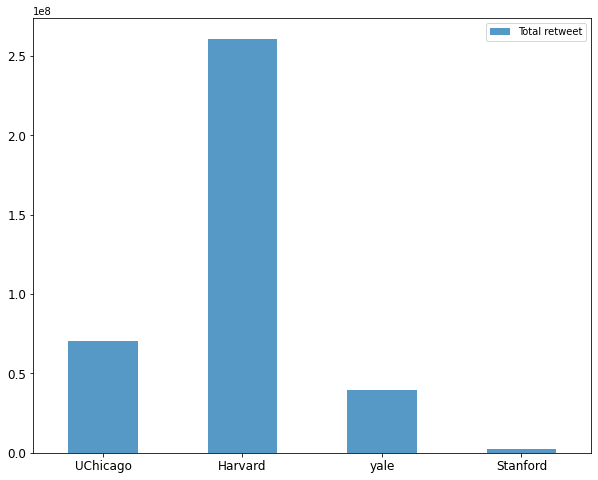

In [10]:
# number of retweet
eda2 = pd.DataFrame([
                     df_uchi.select(sum('retweet_count')).collect()[0][0]  ,
                     df_harvard.select(sum('retweet_count')).collect()[0][0]  ,
                     df_yale.select(sum('retweet_count')).collect()[0][0] ,
                     df_stanford.select(sum('retweet_count')).collect()[0][0]
                    ],
                      index=['UChicago', 'Harvard','yale', 'Stanford'],
                   columns = ['Total retweet'])

eda2.plot.bar(figsize=(10,8),alpha=0.75,rot=0,fontsize=12)
plt.show()

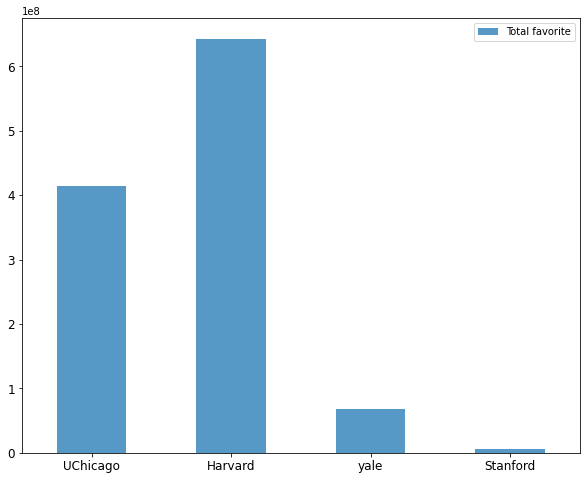

In [11]:
# number of retweet
eda3 = pd.DataFrame([
                     df_uchi.select(sum('favorite_count')).collect()[0][0]  ,
                     df_harvard.select(sum('favorite_count')).collect()[0][0]  ,
                     df_yale.select(sum('favorite_count')).collect()[0][0] ,
                     df_stanford.select(sum('favorite_count')).collect()[0][0]
                    ],
                      index=['UChicago', 'Harvard','yale', 'Stanford'],
                   columns = ['Total favorite'])

eda3.plot.bar(figsize=(10,8),alpha=0.75,rot=0,fontsize=12)
plt.show()

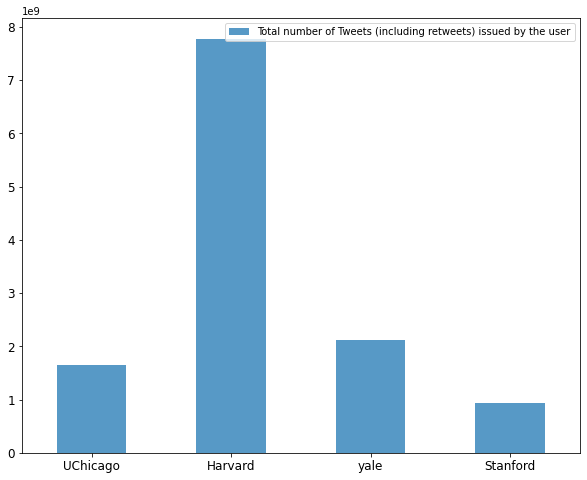

In [12]:
# number of message
eda4 = pd.DataFrame([
                     df_uchi.select(sum('user_message')).collect()[0][0]  ,
                     df_harvard.select(sum('user_message')).collect()[0][0]  ,
                     df_yale.select(sum('user_message')).collect()[0][0] ,
                     df_stanford.select(sum('user_message')).collect()[0][0]
                    ],
                      index=['UChicago', 'Harvard','yale', 'Stanford'],
                   columns = ['Total number of Tweets (including retweets) issued by the user'])

eda4.plot.bar(figsize=(10,8),alpha=0.75,rot=0,fontsize=12)
plt.show()

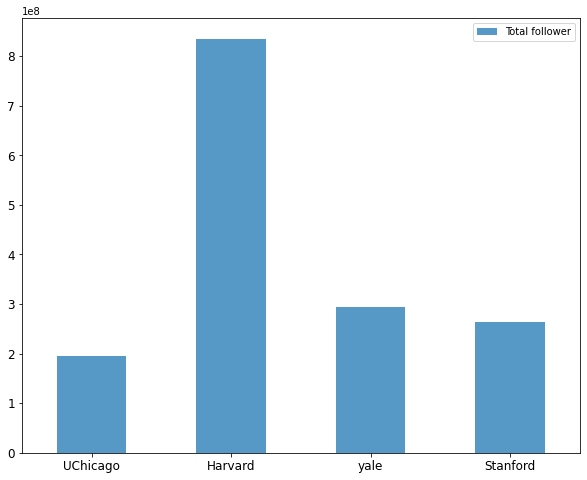

In [13]:
# number of follower
eda4 = pd.DataFrame([
                     df_uchi.select(sum('user_followers_count')).collect()[0][0]  ,
                     df_harvard.select(sum('user_followers_count')).collect()[0][0]  ,
                     df_yale.select(sum('user_followers_count')).collect()[0][0] ,
                     df_stanford.select(sum('user_followers_count')).collect()[0][0]
                    ],
                      index=['UChicago', 'Harvard','yale', 'Stanford'],
                   columns = ['Total follower'])

eda4.plot.bar(figsize=(10,8),alpha=0.75,rot=0,fontsize=12)
plt.show()

## Identify the most prolific / influential Twitterers


### By message volume


In [74]:
tmp1 = df_alluni.groupby(['user_id','user_name']).agg({'user_message':'max'}).sort_values('user_message',ascending = False).head(5)
tmp1

,,user_message
user_id,user_name,
6529402,notiven,9036792
15518000,urbandictionary,4970489
2319610428,ClouDatAI,3510340
2253716036,TheBookofGinko,2525196
3007312628,WhereYouWish,2476954


In [93]:
name1 =int( tmp1.index[0][0])
num1 = int( tmp1['user_message'].iloc[0])
name1,num1 

(6529402, 9036792)

In [82]:
print(f'The most influential twitterers by message volumn of all selected University is user_id {name1}')

The most influential twitterers by message volumn of all selected University is user_id 6529402


### By message retweet


In [84]:
tmp2 = df_alluni.groupby(['user_id','user_name']).agg({'retweet_count':'sum'}).sort_values('retweet_count',ascending = False).head(5)
tmp2

,,retweet_count
user_id,user_name,
980674079391760384,evelyn_marq,40438.0
1227680468075610113,cc30622,39125.0
153892454,fridawrites,38600.0
948446776377462785,aHumanEvolution,35368.0
99668661,edakkumudakku,33492.0


In [91]:
name2  =int( tmp2.index[0][0])
num2 = int( tmp2['retweet_count'].iloc[0])
name2, num2

(980674079391760384, 40438)

In [86]:
print(f'The most influential twitterers by retweet of all selected University is user_id {name2}')

The most influential twitterers by retweet of all selected University is user_id 980674079391760384


### How much are they tweeting about the Universities vs. other topics?

In [ ]:
# all tweet by influ 1 and 2
df_name1 = df_filtered.filter(df_filtered.user_id == int(name1)).count()
df_name2 =df_filtered.filter(df_filtered.user_id == int(name2)).count()

In [35]:
# tweet abou selected unit from influ 1 and 2
df_name1 =  num1
df_name2 =  num2

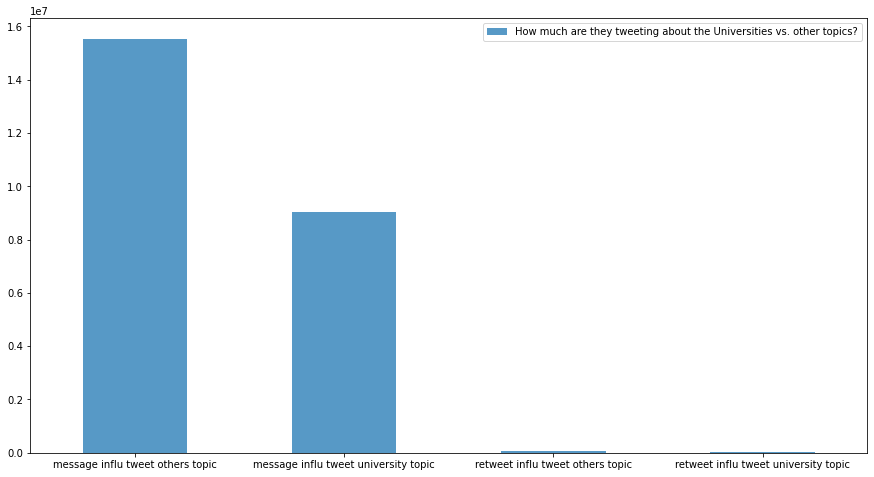

In [33]:
# number of tweet
eda5 = pd.DataFrame([
                    df_name1   ,
                     df_name1_1 ,
                     df_name2 ,
                     df_name2_1 
                    ],
                      index=['message influ tweet others topic', 'message influ tweet university topic'
                             ,'retweet influ tweet others topic', 'retweet influ tweet university topic'],
                   columns = ['How much are they tweeting about the Universities vs. other topics?'])

eda5.plot.bar(figsize=(15,8),alpha=0.75,rot=0,fontsize=10)
plt.show()

In [34]:
print(f'Message Volumne influencer (user_id = {name1}) has tweeted about other topic {df_name1} times ')
print(f'Message Volumne influencer (user_id = {name1}) has tweeted about selected Universities topic {df_name1_1} times ')
print(f'Retweet influencer (user_id = {name2}) has tweeted about other topic {df_name2} times ')
print(f'Retweet influencer (user_id = {name2}) has tweeted about selected Universities topic {df_name2_1} times ')

Message Volumne influencer (user_id = 6529402) has tweeted about other topic 15541129 times 
Message Volumne influencer (user_id = 6529402) has tweeted about selected Universities topic 9036792 times 
Retweet influencer (user_id = 980674079391760384) has tweeted about other topic 78654 times 
Retweet influencer (user_id = 980674079391760384) has tweeted about selected Universities topic 40438 times 


## Where are these Twitterers located?


#### Location of twitterer that twitter about Uchicago

In [14]:
eda_6 = df_uchi.groupBy('user_location').agg(count('user_id')).orderBy('count(user_id)', ascending = False).limit(8).dropna()
eda_6 

user_location,count(user_id)
"Chicago, IL",8511
Chicago,2435
"Chicago, IL 60637",1882
"Cincinnati, OH",1324
United States,703
"Washington, DC",640
"Cincinnati, Ohio",500


#### Location of twitterer that twitter about Stanford

In [15]:
eda_7 = df_stanford.groupBy('user_location').agg(count('user_id')).orderBy('count(user_id)', ascending = False).limit(8).dropna()
eda_7

user_location,count(user_id)
"Stanford, CA",1376
"San Francisco, CA",521
"Palo Alto, CA",488
United States,436
"California, USA",377
San Francisco,314
"New York, NY",227


#### Location of twitterer that twitter about Harvard

In [16]:
eda_8 = df_harvard.groupBy('user_location').agg(count('user_id')).orderBy('count(user_id)', ascending = False).limit(8).dropna()
eda_8

user_location,count(user_id)
"Boston, MA",3615
United States,3380
"Cambridge, MA",3127
"New York, NY",1418
"Los Angeles, CA",1320
"Washington, DC",1315
"California, USA",1288


#### Location of twitterer that twitter about yale

In [17]:
eda_9 = df_yale.groupBy('user_location').agg(count('user_id')).orderBy('count(user_id)', ascending = False).limit(8).dropna()
eda_9

user_location,count(user_id)
"Chicago, IL",1372
"New Haven, CT",1034
"Lagos, Nigeria",908
United States,874
Nigeria,536
Houston & Montreal,462
Worldwide,404


### Do you see any relationship between university locations and Twitterers’ locations?

#### I see that the top twitterer's location is the same as the location of the university. 

### Visualize the relationships

#### Let visualize to see that better.

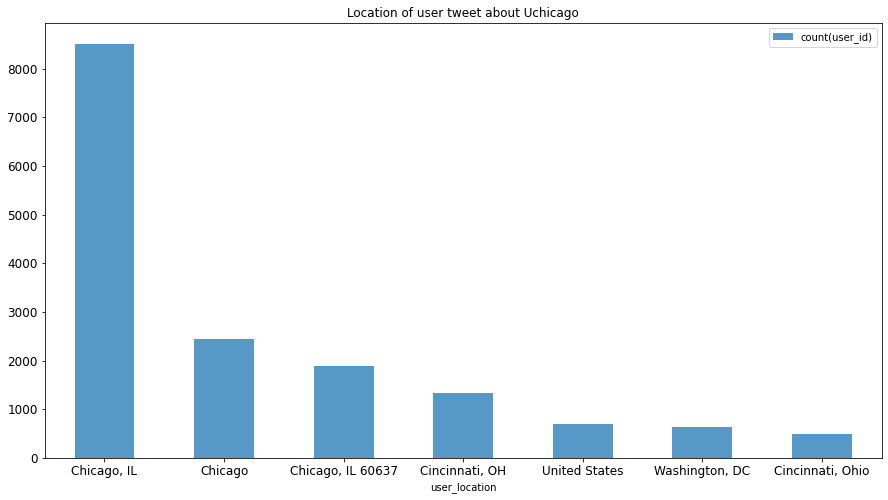

In [18]:
eda_6.toPandas().set_index('user_location').plot.bar(figsize=(15,8),alpha=0.75,rot=0,title='Location of user tweet about Uchicago',fontsize=12)
plt.show()

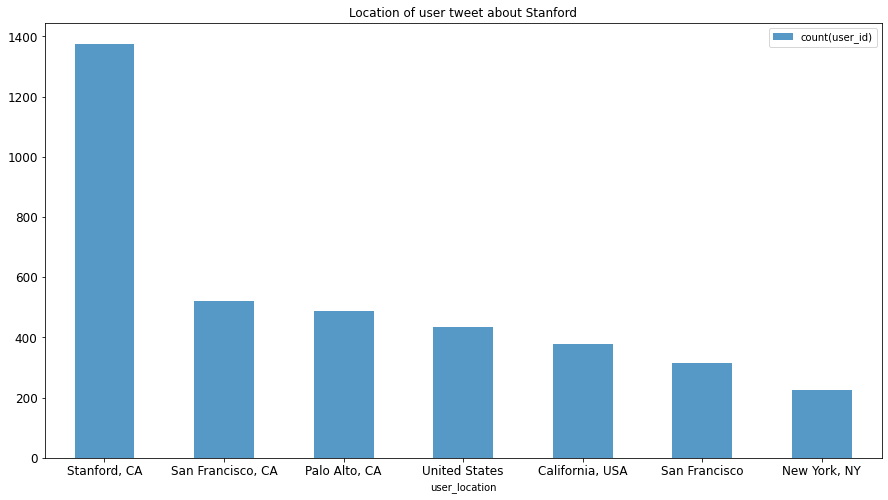

In [19]:
eda_7.toPandas().set_index('user_location').plot.bar(figsize=(15,8),alpha=0.75,rot=0,title='Location of user tweet about Stanford',fontsize=12)
plt.show()

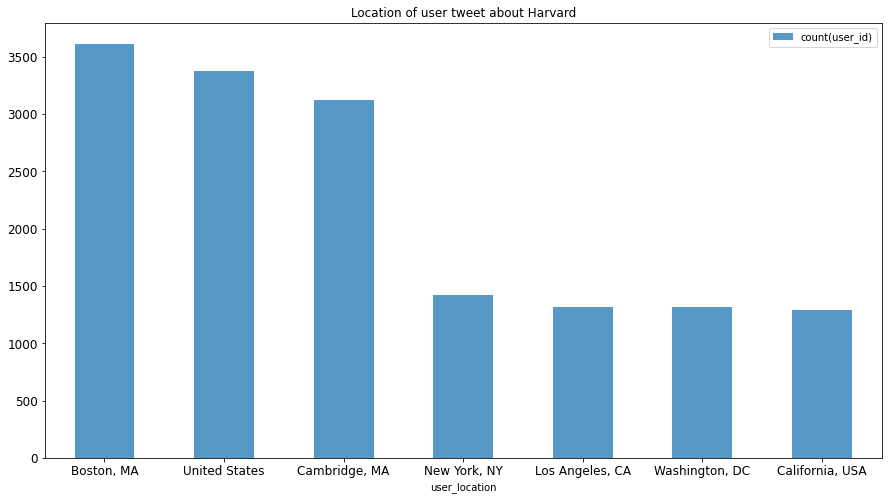

In [20]:
eda_8.toPandas().set_index('user_location').plot.bar(figsize=(15,8),alpha=0.75,rot=0,title='Location of user tweet about Harvard',fontsize=12)
plt.show()

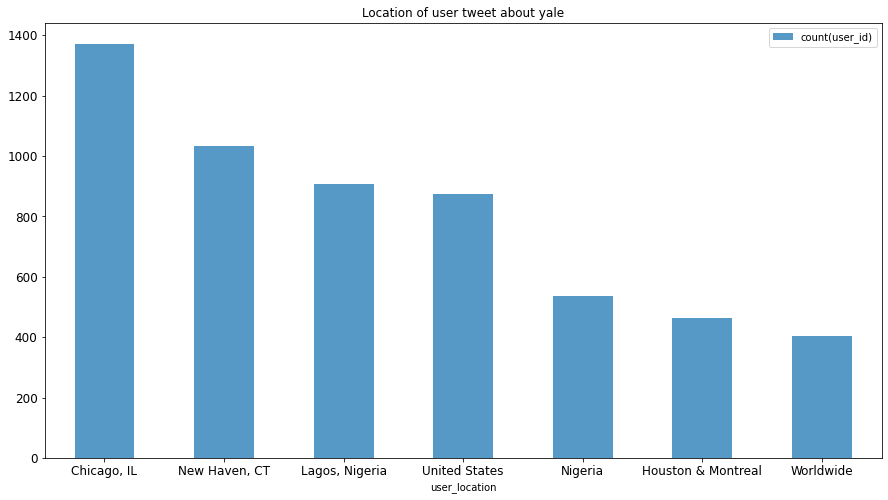

In [21]:
eda_9.toPandas().set_index('user_location').plot.bar(figsize=(15,8),alpha=0.75,rot=0,title='Location of user tweet about yale',fontsize=12)
plt.show()

## What distinguishes University of Chicago Twitterers vs Twitterers who tweet about other universities


#### Visualize the trends


Visualize average follower for each twitters

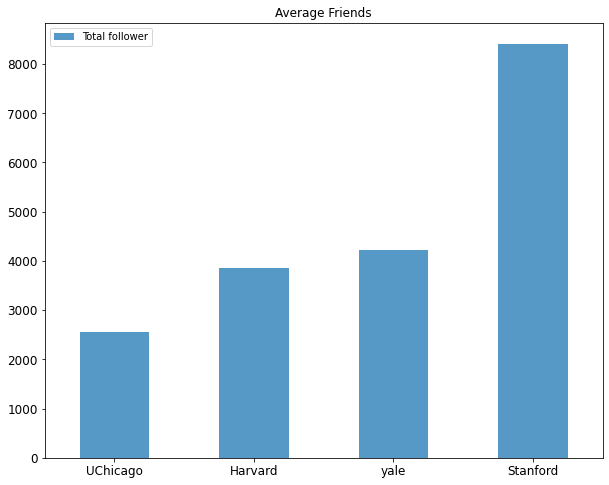

In [22]:
eda10 = pd.DataFrame([
                     df_uchi.agg(round(mean('user_followers_count')).cast('integer')).toPandas().iloc[0].values[0],
                     df_harvard.agg(round(mean('user_followers_count')).cast('integer')).toPandas().iloc[0].values[0],
                     df_yale.agg(round(mean('user_followers_count')).cast('integer')).toPandas().iloc[0].values[0],
                     df_stanford.agg(round(mean('user_followers_count')).cast('integer')).toPandas().iloc[0].values[0]
                    ],
                      index=['UChicago', 'Harvard','yale', 'Stanford'],
                   columns = ['Total follower'])

eda10.plot.bar(figsize=(10,8),alpha=0.75,rot=0,fontsize=12,title= 'Average Friends')
plt.show()

We can see the the number of follower of twitterer who mention yale is far more that other university as well as UChicago

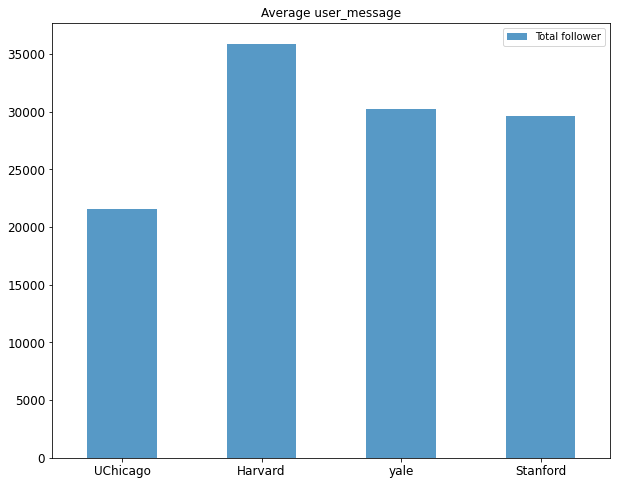

In [23]:
eda11 = pd.DataFrame([
                     df_uchi.agg(round(mean('user_message')).cast('integer')).toPandas().iloc[0].values[0],
                     df_harvard.agg(round(mean('user_message')).cast('integer')).toPandas().iloc[0].values[0],
                     df_yale.agg(round(mean('user_message')).cast('integer')).toPandas().iloc[0].values[0],
                     df_stanford.agg(round(mean('user_message')).cast('integer')).toPandas().iloc[0].values[0]
                    ],
                      index=['UChicago', 'Harvard','yale', 'Stanford'],
                   columns = ['Total follower'])

eda11.plot.bar(figsize=(10,8),alpha=0.75,rot=0,fontsize=12,title= 'Average user_message')
plt.show()

Again, We can see the the number of message of twitterer who mention yale is far more that other university as well as UChicago. But Standford has a good amount of message too.

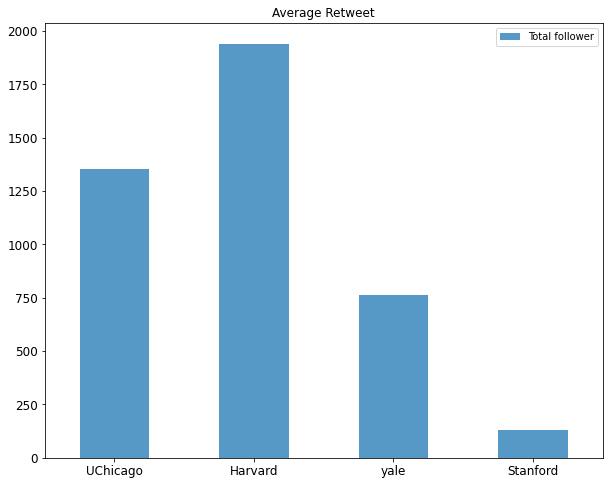

In [24]:
eda12 = pd.DataFrame([
                     df_uchi.agg(round(mean('retweet_count')).cast('integer')).toPandas().iloc[0].values[0],
                     df_harvard.agg(round(mean('retweet_count')).cast('integer')).toPandas().iloc[0].values[0],
                     df_yale.agg(round(mean('retweet_count')).cast('integer')).toPandas().iloc[0].values[0],
                     df_stanford.agg(round(mean('retweet_count')).cast('integer')).toPandas().iloc[0].values[0]
                    ],
                      index=['UChicago', 'Harvard','yale', 'Stanford'],
                   columns = ['Total follower'])

eda12.plot.bar(figsize=(10,8),alpha=0.75,rot=0,fontsize=12,title= 'Average Retweet')
plt.show()

Again, We can see the the number of retweet of twitterer who mention yale is far more that other university as well as UChicago.

## What are the timelines of these tweets? Do you see significant peaks and valleys?

### Do you see data collection gaps?


In [99]:
df_alluni_datetime = df_alluni.select('id','created_at').\
    withColumn('Date', split('created_at', ' ')).\
    withColumn('weekday', col('Date')[0]).\
    withColumn('month', col('Date')[1]).\
    withColumn('Day', col('Date')[2]).\
    withColumn('Year', col('Date')[5]).\
    withColumn('fulldate',concat_ws('-','Month','Day','Year')).\
    withColumn('time_hour', substring(col('Date')[3],0,2))


In [100]:
df_monthly = df_alluni_datetime.select('id', 'month')\
        .groupby('month').agg(count('id'))\
        .orderBy('month', ascending = True).toPandas()

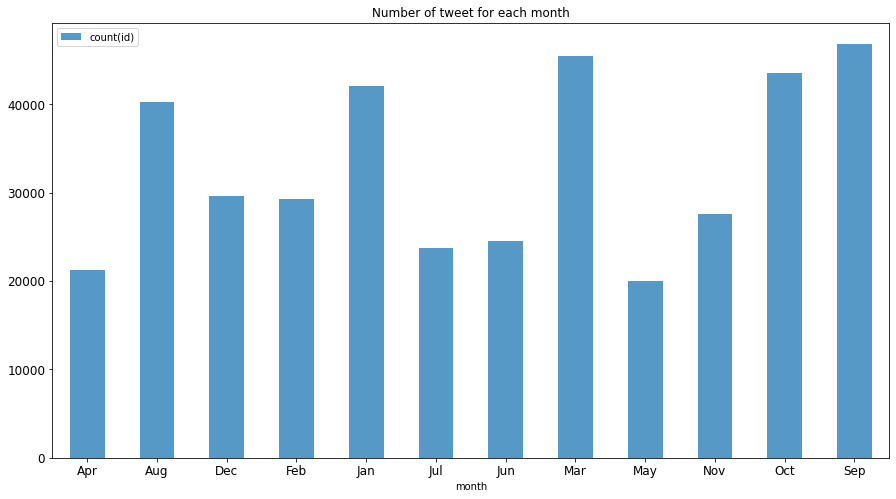

In [101]:
df_monthly.set_index('month').plot.bar(figsize=(15,8),alpha=0.75,rot=0,fontsize=12,title= 'Number of tweet for each month')
plt.show()

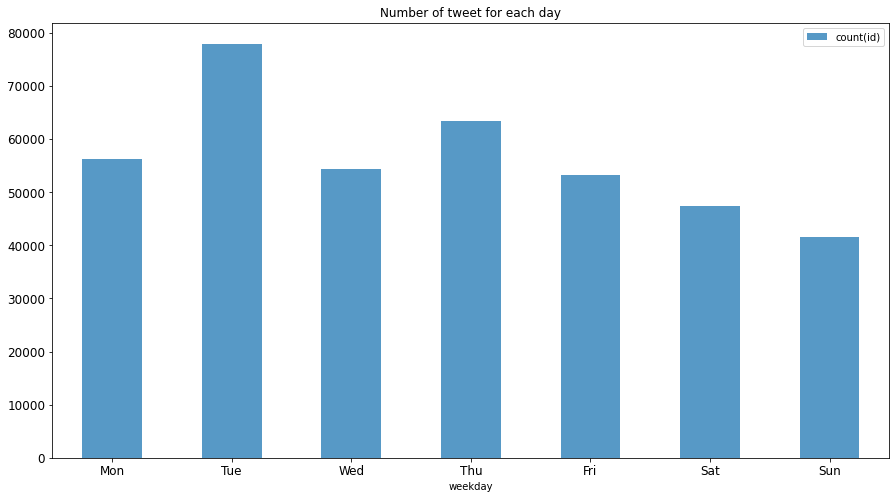

In [102]:
df_weekday = df_alluni_datetime.select('id', 'weekday')\
        .groupby('weekday').agg(count('id'))\
        .orderBy('weekday', ascending = True).toPandas()

cats = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df_weekday['weekday'] = pd.Categorical(df_weekday['weekday'], categories=cats, ordered=True)
df_weekday = df_weekday.sort_values('weekday')

df_weekday.set_index('weekday').plot.bar(figsize=(15,8),alpha=0.75,rot=0,fontsize=12,title= 'Number of tweet for each day')
plt.show()

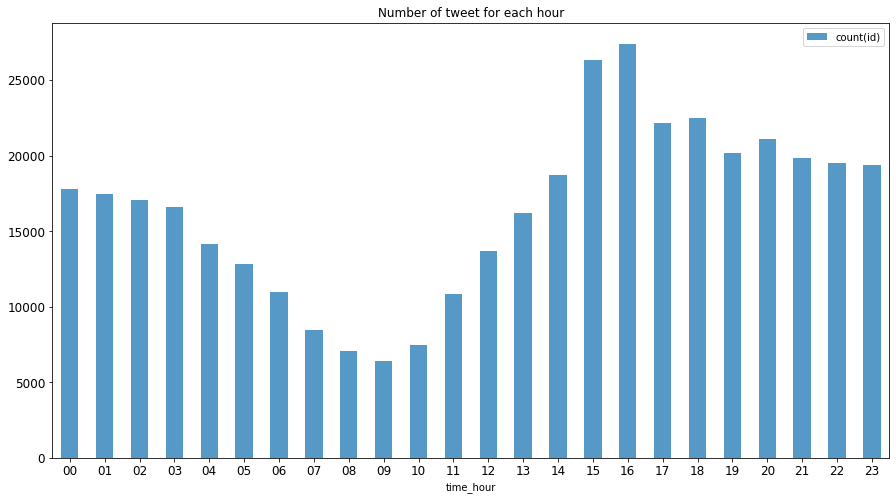

In [103]:
df_hourly = df_alluni_datetime.select('id', 'time_hour')\
        .groupby('time_hour').agg(count('id'))\
        .orderBy('time_hour', ascending = True).toPandas()
df_hourly.set_index('time_hour').plot.bar(figsize=(15,8),alpha=0.75,rot=0,fontsize=12,title= 'Number of tweet for each hour')
plt.show()

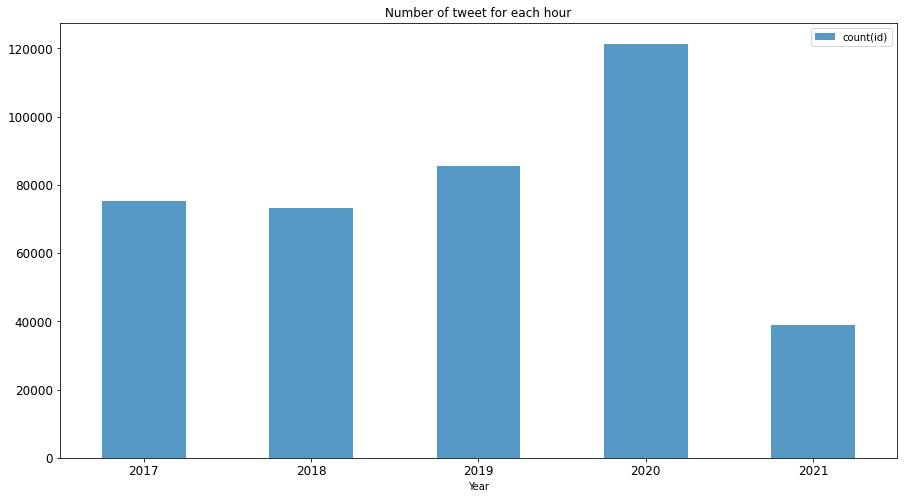

In [104]:
df_yearly = df_alluni_datetime.select('id', 'Year')\
        .groupby('Year').agg(count('id'))\
        .orderBy('Year', ascending = True).toPandas()
df_yearly.set_index('Year').plot.bar(figsize=(15,8),alpha=0.75,rot=0,fontsize=12,title= 'Number of tweet for each hour')
plt.show()

## How unique are the messages for each of these universities?


In [26]:
import os
from itertools import compress 
from datetime import datetime
import re
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql import Window
from datetime import datetime, timedelta
from pyspark.ml.feature import MinHashLSH
from itertools import combinations, takewhile

In [27]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from pyspark.sql import Row
from pyspark.ml.feature import CountVectorizer,  IDF, CountVectorizerModel, Tokenizer, RegexTokenizer, StopWordsRemover

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#### Using MinHash

### Uchicago

In [28]:
text = df_uchi.select('text').limit(10000).rdd.map(lambda x : x['text']).filter(lambda x: x is not None)

StopWords = stopwords.words("english")

tokens = text\
    .map( lambda document: document.strip().lower())\
    .map( lambda document: re.split(" ", document))\
    .map( lambda word: [x for x in word if len(x) > 1] )\
    .zipWithIndex()
row = Row('text')
df_text = text.map(row).zipWithIndex().toDF(['text','id'])
df_tokens = spark.createDataFrame(tokens, ["list_of_words",'id'])
df_tokens = df_tokens.where(col('list_of_words').getItem(0).isNotNull())

In [29]:
# creating the dataframe with text and id
df_tokens= spark.createDataFrame(tokens, ["list_of_words",'id'])

In [30]:
df_tokens = spark.createDataFrame(tokens, ["list_of_words",'id'])
df_tokens = df_tokens.where(col('list_of_words').getItem(0).isNotNull())

In [31]:
# vectorizer
vectorize = CountVectorizer(inputCol="list_of_words", outputCol="features", minDF=1.0)
df_vectorize = vectorize.fit(df_tokens).transform(df_tokens)

In [32]:
#MinHash
mh = MinHashLSH(inputCol="features", outputCol="hashes", numHashTables=4)
model = mh.fit(df_vectorize)
df_hashed = mh.fit(df_vectorize).transform(df_vectorize).cache()
df_hashed_text = df_text.join(df_hashed, "id", how = 'left').cache()

In [ ]:
jaccard_distance = 0.3
jaccard = 0.3

df_dups_text = model.approxSimilarityJoin(df_hashed_text, df_hashed_text, jaccard_distance).filter("datasetA.id < datasetB.id").select(
            col("distCol"),
            col("datasetA.id").alias("id_A"),
            col("datasetB.id").alias("id_B"),
            col('datasetA.text').alias('text_A'),
            col('datasetB.text').alias('text_B'))

df_dups_text.limit(5)

distCol,id_A,id_B,text_A,text_B
0.0,1677,6395,[RT @finessence_:...,[RT @finessence_:...
0.0,1677,4175,[RT @finessence_:...,[RT @finessence_:...
0.0,1677,4203,[RT @finessence_:...,[RT @finessence_:...
0.0,1677,9585,[RT @finessence_:...,[RT @finessence_:...
0.0,1677,6375,[RT @finessence_:...,[RT @finessence_:...


### Are they mostly unique? Or mostly people are just copy-pasting the same text?

In [ ]:
records = df_hashed_text.count()
dups = df_dups_text.select('id_A').distinct().count()
uniques = records - dups

print ('Total records: ', records)
print ('Duplicate titles based on {', jaccard_distance, '} jaccard distance: ', dups)
print ('Unique titles based on {', jaccard_distance, '} jaccard distance: ', jaccard_distance, ': ', uniques)

Total records:  10000
Duplicate titles based on { 0.3 } jaccard distance:  6161
Unique titles based on { 0.3 } jaccard distance:  0.3 :  3839


### Visualize message duplication (for each university – not between the universities)


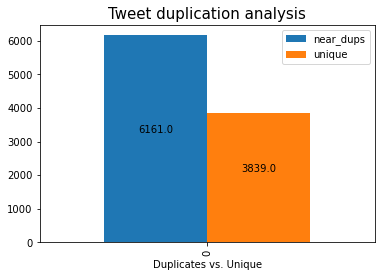

In [ ]:
dups_df = pd.DataFrame.from_dict({'near_dups': [dups], 'unique': [uniques]})

ax=dups_df.plot(kind = 'bar',y=['near_dups', 'unique'], fontsize=10, color=['C0', 'C1'], align='center', width=0.8)
ax.set_title('Tweet duplication analysis', fontsize=15)
ax.set_xlabel('Duplicates vs. Unique')
for p in ax.patches:
       ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()/2), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points') 

### Harvard

In [ ]:
text = df_harvard.select('text').limit(10000).rdd.map(lambda x : x['text']).filter(lambda x: x is not None)

StopWords = stopwords.words("english")

tokens = text\
    .map( lambda document: document.strip().lower())\
    .map( lambda document: re.split(" ", document))\
    .map( lambda word: [x for x in word if len(x) > 1] )\
    .zipWithIndex()
row = Row('text')
df_text = text.map(row).zipWithIndex().toDF(['text','id'])
df_tokens = spark.createDataFrame(tokens, ["list_of_words",'id'])
df_tokens = df_tokens.where(col('list_of_words').getItem(0).isNotNull())

In [ ]:
# creating the dataframe with text and id
df_tokens= spark.createDataFrame(tokens, ["list_of_words",'id'])

In [ ]:
df_tokens = spark.createDataFrame(tokens, ["list_of_words",'id'])
df_tokens = df_tokens.where(col('list_of_words').getItem(0).isNotNull())

In [ ]:
# vectorizer
vectorize = CountVectorizer(inputCol="list_of_words", outputCol="features", minDF=1.0)
df_vectorize = vectorize.fit(df_tokens).transform(df_tokens)

In [ ]:
#MinHash
mh = MinHashLSH(inputCol="features", outputCol="hashes", numHashTables=4)
model = mh.fit(df_vectorize)
df_hashed = mh.fit(df_vectorize).transform(df_vectorize).cache()
df_hashed_text = df_text.join(df_hashed, "id", how = 'left').cache()

In [ ]:
# Jaccard distance = 0.3
jaccard = 0.3

df_dups_text = model.approxSimilarityJoin(df_hashed_text, df_hashed_text, jaccard_distance).filter("datasetA.id < datasetB.id").select(
            col("distCol"),
            col("datasetA.id").alias("id_A"),
            col("datasetB.id").alias("id_B"),
            col('datasetA.text').alias('text_A'),
            col('datasetB.text').alias('text_B'))

df_dups_text.limit(5)

distCol,id_A,id_B,text_A,text_B
0.0,1677,1680,[RT @KlarksonCell...,[RT @KlarksonCell...
0.0,1677,2085,[RT @KlarksonCell...,[RT @KlarksonCell...
0.0,1697,2426,[RT @KlarksonCell...,[RT @KlarksonCell...
0.0,1697,4507,[RT @KlarksonCell...,[RT @KlarksonCell...
0.0,1697,1698,[RT @KlarksonCell...,[RT @KlarksonCell...


### Are they mostly unique? Or mostly people are just copy-pasting the same text?

In [ ]:
records = df_hashed_text.count()
dups = df_dups_text.select('id_A').distinct().count()
uniques = records - dups

print ('Total records: ', records)
print ('Duplicate titles based on {', jaccard_distance, '} jaccard distance: ', dups)
print ('Unique titles based on {', jaccard_distance, '} jaccard distance: ', jaccard_distance, ': ', uniques)

Total records:  10000
Duplicate titles based on { 0.3 } jaccard distance:  5540
Unique titles based on { 0.3 } jaccard distance:  0.3 :  4460


### Visualize message duplication (for each university – not between the universities)


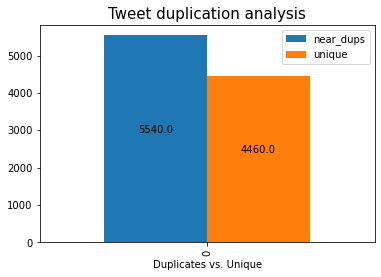

In [ ]:
dups_df = pd.DataFrame.from_dict({'near_dups': [dups], 'unique': [uniques]})

ax=dups_df.plot(kind = 'bar',y=['near_dups', 'unique'], fontsize=10, color=['C0', 'C1'], align='center', width=0.8)
ax.set_title('Tweet duplication analysis', fontsize=15)
ax.set_xlabel('Duplicates vs. Unique')
for p in ax.patches:
       ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()/2), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points') 

### Stanford

In [ ]:
text = df_stanford.select('text').limit(10000).rdd.map(lambda x : x['text']).filter(lambda x: x is not None)

StopWords = stopwords.words("english")

tokens = text\
    .map( lambda document: document.strip().lower())\
    .map( lambda document: re.split(" ", document))\
    .map( lambda word: [x for x in word if len(x) > 1] )\
    .zipWithIndex()
row = Row('text')
df_text = text.map(row).zipWithIndex().toDF(['text','id'])
df_tokens = spark.createDataFrame(tokens, ["list_of_words",'id'])
df_tokens = df_tokens.where(col('list_of_words').getItem(0).isNotNull())

In [ ]:
# creating the dataframe with text and id
df_tokens= spark.createDataFrame(tokens, ["list_of_words",'id'])

In [ ]:
df_tokens = spark.createDataFrame(tokens, ["list_of_words",'id'])
df_tokens = df_tokens.where(col('list_of_words').getItem(0).isNotNull())

In [ ]:
# vectorizer
vectorize = CountVectorizer(inputCol="list_of_words", outputCol="features", minDF=1.0)
df_vectorize = vectorize.fit(df_tokens).transform(df_tokens)

In [ ]:
#MinHash
mh = MinHashLSH(inputCol="features", outputCol="hashes", numHashTables=4)
model = mh.fit(df_vectorize)
df_hashed = mh.fit(df_vectorize).transform(df_vectorize).cache()
df_hashed_text = df_text.join(df_hashed, "id", how = 'left').cache()

In [ ]:
# Jaccard distance = 0.3
jaccard = 0.3

df_dups_text = model.approxSimilarityJoin(df_hashed_text, df_hashed_text, jaccard_distance).filter("datasetA.id < datasetB.id").select(
            col("distCol"),
            col("datasetA.id").alias("id_A"),
            col("datasetB.id").alias("id_B"),
            col('datasetA.text').alias('text_A'),
            col('datasetB.text').alias('text_B'))

df_dups_text.limit(5)

distCol,id_A,id_B,text_A,text_B
0.0,26,494,[RT @alexmagnusBT...,[RT @alexmagnusBT...
0.0,2040,2046,[RT @byemollyxo: ...,[RT @byemollyxo: ...
0.0,2040,3767,[RT @byemollyxo: ...,[RT @byemollyxo: ...
0.0,2040,4108,[RT @byemollyxo: ...,[RT @byemollyxo: ...
0.0,2509,3725,[RT @byemollyxo: ...,[RT @byemollyxo: ...


### Are they mostly unique? Or mostly people are just copy-pasting the same text?

In [ ]:
records = df_hashed_text.count()
dups = df_dups_text.select('id_A').distinct().count()
uniques = records - dups

print ('Total records: ', records)
print ('Duplicate titles based on {', jaccard_distance, '} jaccard distance: ', dups)
print ('Unique titles based on {', jaccard_distance, '} jaccard distance: ', jaccard_distance, ': ', uniques)

Total records:  10000
Duplicate titles based on { 0.3 } jaccard distance:  4658
Unique titles based on { 0.3 } jaccard distance:  0.3 :  5342


### Visualize message duplication (for each university – not between the universities)


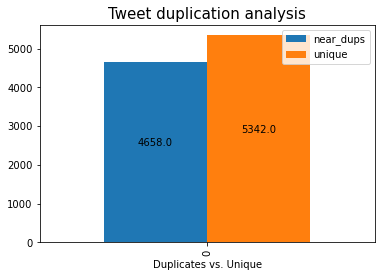

In [ ]:
dups_df = pd.DataFrame.from_dict({'near_dups': [dups], 'unique': [uniques]})

ax=dups_df.plot(kind = 'bar',y=['near_dups', 'unique'], fontsize=10, color=['C0', 'C1'], align='center', width=0.8)
ax.set_title('Tweet duplication analysis', fontsize=15)
ax.set_xlabel('Duplicates vs. Unique')
for p in ax.patches:
       ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()/2), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points') 

### yale

In [ ]:
text = df_yale.select('text').limit(10000).rdd.map(lambda x : x['text']).filter(lambda x: x is not None)

StopWords = stopwords.words("english")

tokens = text\
    .map( lambda document: document.strip().lower())\
    .map( lambda document: re.split(" ", document))\
    .map( lambda word: [x for x in word if len(x) > 1] )\
    .zipWithIndex()
row = Row('text')
df_text = text.map(row).zipWithIndex().toDF(['text','id'])
df_tokens = spark.createDataFrame(tokens, ["list_of_words",'id'])
df_tokens = df_tokens.where(col('list_of_words').getItem(0).isNotNull())

In [ ]:
# creating the dataframe with text and id
df_tokens= spark.createDataFrame(tokens, ["list_of_words",'id'])

In [ ]:
df_tokens = spark.createDataFrame(tokens, ["list_of_words",'id'])
df_tokens = df_tokens.where(col('list_of_words').getItem(0).isNotNull())

In [ ]:
# vectorizer
vectorize = CountVectorizer(inputCol="list_of_words", outputCol="features", minDF=1.0)
df_vectorize = vectorize.fit(df_tokens).transform(df_tokens)

In [ ]:
#MinHash
mh = MinHashLSH(inputCol="features", outputCol="hashes", numHashTables=4)
model = mh.fit(df_vectorize)
df_hashed = mh.fit(df_vectorize).transform(df_vectorize).cache()
df_hashed_text = df_text.join(df_hashed, "id", how = 'left').cache()

In [ ]:
# Jaccard distance = 0.3
jaccard = 0.3

df_dups_text = model.approxSimilarityJoin(df_hashed_text, df_hashed_text, jaccard_distance).filter("datasetA.id < datasetB.id").select(
            col("distCol"),
            col("datasetA.id").alias("id_A"),
            col("datasetB.id").alias("id_B"),
            col('datasetA.text').alias('text_A'),
            col('datasetB.text').alias('text_B'))

df_dups_text.limit(5)

distCol,id_A,id_B,text_A,text_B
0.0,1950,2952,[RT @DariusDJJack...,[RT @DariusDJJack...
0.1428571428571429,2453,2899,[RT @AEWrestling:...,[RT @AEWrestling:...
0.0,3506,4099,[RT @mazi_atom: T...,[RT @mazi_atom: T...
0.0,4823,6372,[RT @mazi_atom: T...,[RT @mazi_atom: T...
0.0,3937,3940,[RT @yaleforberni...,[RT @yaleforberni...


### Are they mostly unique? Or mostly people are just copy-pasting the same text?

In [ ]:
records = df_hashed_text.count()
dups = df_dups_text.select('id_A').distinct().count()
uniques = records - dups

print ('Total records: ', records)
print ('Duplicate titles based on {', jaccard_distance, '} jaccard distance: ', dups)
print ('Unique titles based on {', jaccard_distance, '} jaccard distance: ', jaccard_distance, ': ', uniques)

Total records:  10000
Duplicate titles based on { 0.3 } jaccard distance:  6211
Unique titles based on { 0.3 } jaccard distance:  0.3 :  3789


### Visualize message duplication (for each university – not between the universities)


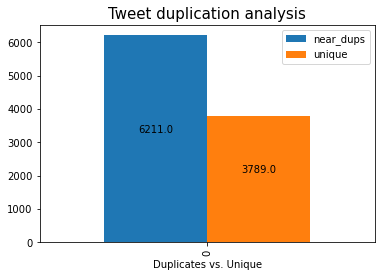

In [ ]:
dups_df = pd.DataFrame.from_dict({'near_dups': [dups], 'unique': [uniques]})

ax=dups_df.plot(kind = 'bar',y=['near_dups', 'unique'], fontsize=10, color=['C0', 'C1'], align='center', width=0.8)
ax.set_title('Tweet duplication analysis', fontsize=15)
ax.set_xlabel('Duplicates vs. Unique')
for p in ax.patches:
       ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()/2), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points') 